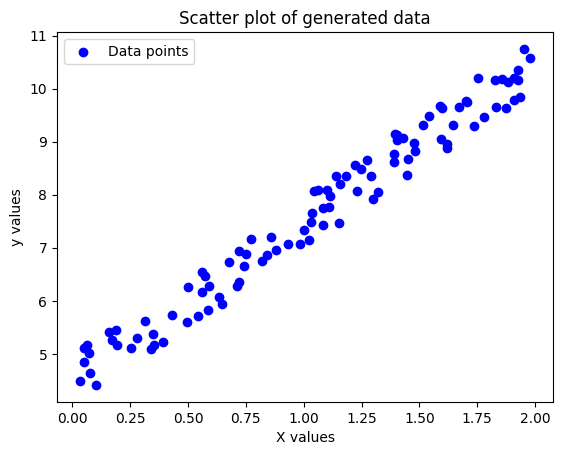

In [22]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)

plt.scatter(X, y, color='blue', label='Data points')

# Add labels and title
plt.xlabel('X values')
plt.ylabel('y values')
plt.title('Scatter plot of generated data')
plt.legend()
plt.show()


In [23]:
X_b = np.c_[np.ones((100,1)), X]  # add x0 = 1 to each instance 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)


In [24]:
theta_best
"""Normal Equation Result"""

'Normal Equation Result'

In [25]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance 
y_predict = X_new_b.dot(theta_best)
y_predict


array([[ 4.51381898],
       [10.47279364]])

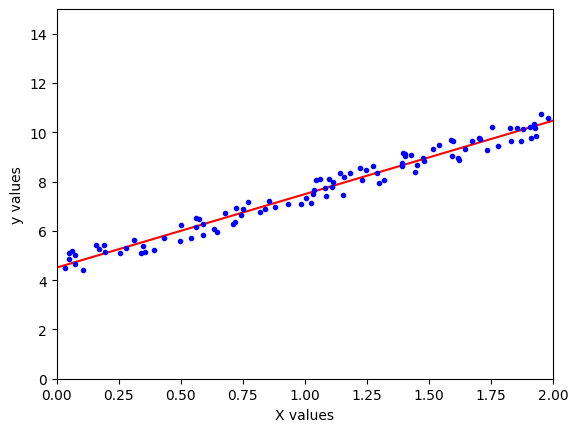

In [26]:
plt.xlabel('X values')
plt.ylabel('y values')
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()


In [27]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_


(array([4.51381898]), array([[2.97948733]]))

In [28]:
lin_reg.predict(X_new)

array([[ 4.51381898],
       [10.47279364]])

In [29]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.51381898],
       [2.97948733]])

In [30]:
np.linalg.pinv(X_b).dot(y)

array([[4.51381898],
       [2.97948733]])

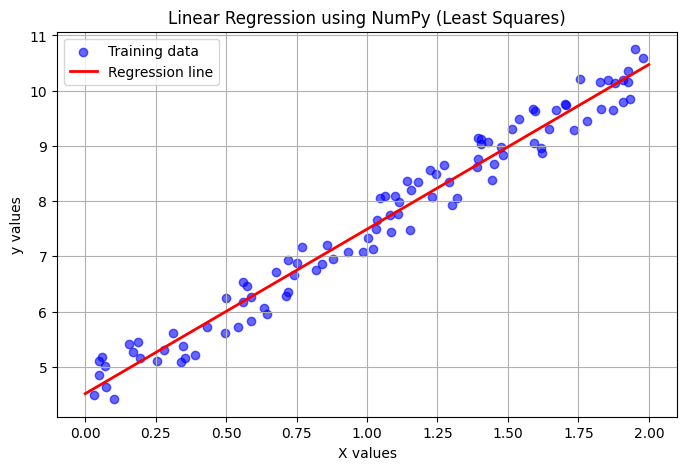

In [31]:
# 3️⃣ Solve for theta using least squares (SVD)
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
# or equivalently:
# theta_best_svd = np.linalg.pinv(X_b).dot(y)

# 4️⃣ Prepare new data for plotting the regression line
X_new = np.array([[0], [2]])   # from x = 0 to x = 2
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best_svd)

# 5️⃣ Plot the data and regression line
plt.figure(figsize=(8,5))
plt.scatter(X, y, color="blue", alpha=0.6, label="Training data")
plt.plot(X_new, y_predict, color="red", linewidth=2, label="Regression line")

# Add labels and title
plt.xlabel("X values")
plt.ylabel("y values")
plt.title("Linear Regression using NumPy (Least Squares)")
plt.legend()
plt.grid(True)
plt.show()

Theta (intercept, slope): [4.21509616 2.77011339]


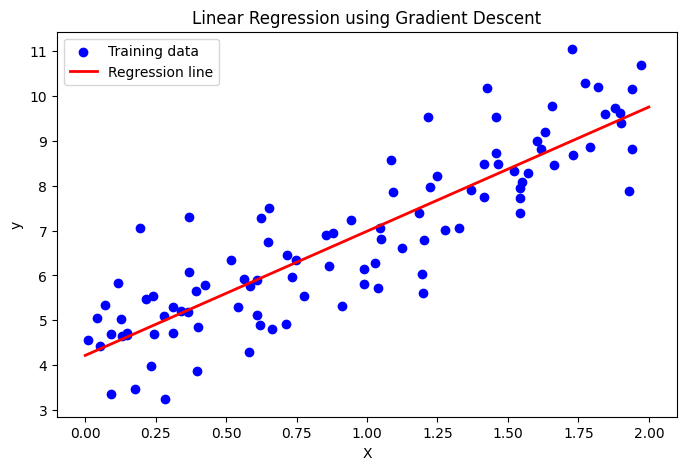

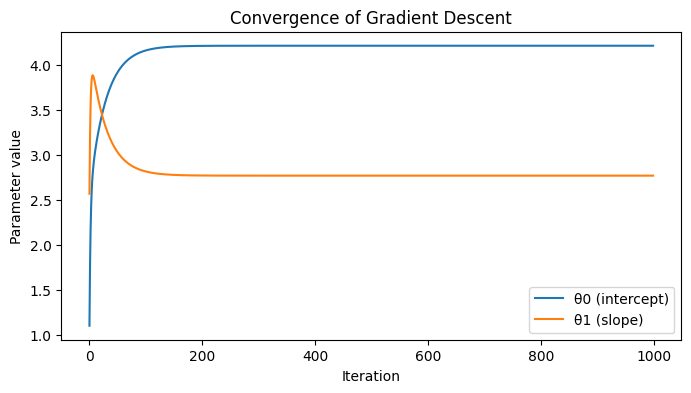

In [32]:
"""Gradient Descent for linear regression """

import numpy as np
import matplotlib.pyplot as plt

# Generate some sample linear data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add the bias term (x0 = 1)
X_b = np.c_[np.ones((100, 1)), X]

# Gradient Descent parameters
eta = 0.1        # learning rate
n_iterations = 1000
m = 100

# Random initialization of theta
theta = np.random.randn(2, 1)

# Store the path of theta for plotting convergence
theta_path = []

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    theta_path.append(theta.copy())

# Final theta
print("Theta (intercept, slope):", theta.ravel())

# Plotting the regression line
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="blue", label="Training data")
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta)
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Regression line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression using Gradient Descent")
plt.legend()
plt.show()

# Plot convergence of theta values
theta_path = np.array(theta_path).reshape(n_iterations, 2)
plt.figure(figsize=(8, 4))
plt.plot(theta_path[:, 0], label="θ0 (intercept)")
plt.plot(theta_path[:, 1], label="θ1 (slope)")
plt.xlabel("Iteration")
plt.ylabel("Parameter value")
plt.title("Convergence of Gradient Descent")
plt.legend()
plt.show()


In [33]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters 

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # randon initialization 

for epoch in range(n_epochs):
    for i in range(m):
        randon_index = np.random.randint(m)
        xi = X_b[randon_index:randon_index+1]
        yi = y[randon_index:randon_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

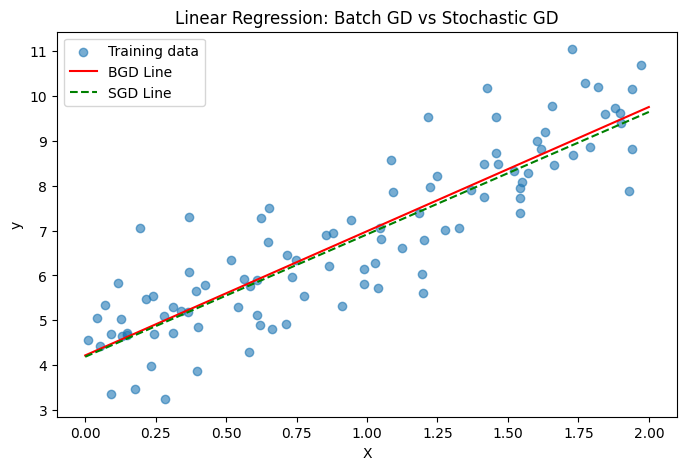

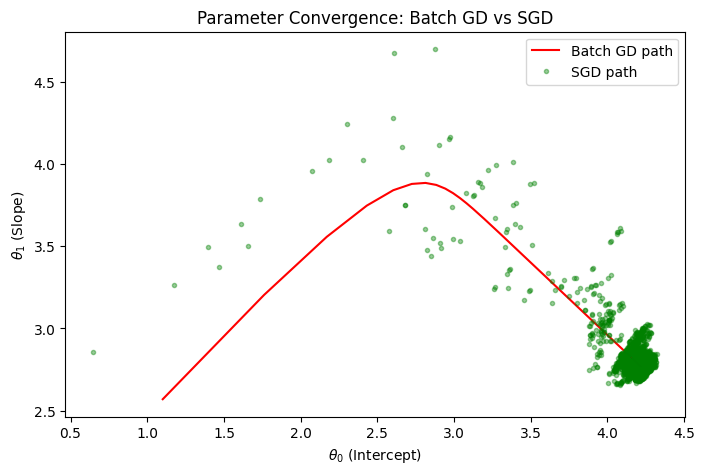

In [ ]:
"""Differences between Batch Gradient Descent (BGD) and Stochastic Gradient Descent (SGD)"""
import numpy as np
import matplotlib.pyplot as plt

# --- 1️⃣ Generate linear data ---
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]  # add bias term (x0 = 1)
m = len(X)

# --- 2️⃣ Batch Gradient Descent ---
eta = 0.1
n_iterations = 1000
theta_bgd = np.random.randn(2,1)
theta_path_bgd = []

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta_bgd) - y)
    theta_bgd = theta_bgd - eta * gradients
    theta_path_bgd.append(theta_bgd.copy())

# --- 3️⃣ Stochastic Gradient Descent ---
n_epochs = 50
t0, t1 = 5, 50  # learning schedule parameters

def learning_schedule(t):
    return t0 / (t + t1)

theta_sgd = np.random.randn(2,1)
theta_path_sgd = []

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta_sgd) - yi)
        eta = learning_schedule(epoch * m + i)
        theta_sgd = theta_sgd - eta * gradients
        theta_path_sgd.append(theta_sgd.copy())

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)

# --- 4️⃣ Plot regression line ---
plt.figure(figsize=(8,5))
plt.scatter(X, y, alpha=0.6, label="Training data")
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict_bgd = X_new_b.dot(theta_bgd)
y_predict_sgd = X_new_b.dot(theta_sgd)

plt.plot(X_new, y_predict_bgd, "r-", label="BGD Line")
plt.plot(X_new, y_predict_sgd, "g--", label="SGD Line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression: Batch GD vs Stochastic GD")
plt.legend()
plt.show()

# --- 5️⃣ Plot parameter convergence ---
plt.figure(figsize=(8,5))
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "r-", label="Batch GD path")
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "g.", alpha=0.4, label="SGD path")
plt.xlabel(r"$\theta_0$ (Intercept)")
plt.ylabel(r"$\theta_1$ (Slope)")
plt.title("Parameter Convergence: Batch GD vs SGD")
plt.legend()
plt.show()


In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_
"""Once again, you find a solution quite close to the one returned by the Normal Equa‐
tion"""

(array([4.21647744]), array([2.77853398]))